This is a project to take the area reports submitted by Knowledge Services members and forming a word cloud to see what all the group is/has been working and how it may look. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import textwrap

import glob
import re

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords


%matplotlib inline

### Read in data for one file (testing)

```
f = open('../results/text/2017_10_04_KSM_Area_Reports.txt')
ftext = f.read()
text = re.split(r'\W+', ftext)

body = ""
for item in text:
    body = body + " " + item

corpus = word_tokenize(body)
```

### Read in the data

In [2]:
fnames = glob.glob('../results/text/*.txt')
body = ''

for f in fnames:
    file = open(f)
    ftext = file.read()
    text = re.split(r'\W+', ftext)
    for item in text:
        body = body + ' ' + item
        
corpus = word_tokenize(body)

### clean up punctuation  

In [3]:
corpus=[word.lower() for word in corpus if word.isalpha()]

## clean up for stopwords 

In [4]:
stop_words = set(stopwords.words('english'))

with open ('/Users/laufers/projects/nlk_python/stopwords.txt') as f:
    stop_word_add = [line.rstrip() for line in f]
f.closed

for item in stop_word_add:
    stop_words.update([item])

# Team names
for item in ["carl", "chelsea","barb", "tyler", "david", 'twila','fred','tara','sarah','paul',
             'matt', 'john', 'mark', 'kim']:
    stop_words.update([item])

# months and other date related items
for item in ['january','jan','february','feb','march','mar','april','apr','may','june','jun',
             'july','jul','august','aug','september','sep','october','oct','november','nov',
             'december','dec']:
    stop_words.update([item])

# other words
for item in ['worked','also','file']:
    stop_words.update([item])

    
filtered_words = []
for w in corpus:
    if w not in stop_words:
        filtered_words.append(w)

In [5]:
# Final corpus files
original = nltk.Text(corpus)
final = nltk.Text(filtered_words)

In [6]:
# Start of working with the Word Frequency
import operator

fq = nltk.FreqDist(final)
fq_sorted = sorted(fq.items(), key=operator.itemgetter(1))
fq_sorted.reverse()

print("\nTop 100 most frequent words")
for word, freq in fq.most_common(100):
    print(" {:15s} {:3d} ".format(word, freq))

# Concordance for the top 10 frequent words
top_5_fq = []
print('\n\nConcordance for the top 25 frequent words\n')
for word, freq in fq.most_common(25):
    print("{:15s} {:3d}".format(word, freq))
    original.concordance(word)
    print('\n')
    top_5_fq.append(word)


Top 100 most frequent words
 working         171 
 project         162 
 data            157 
 digital         152 
 ou              152 
 new             151 
 shareok         145 
 collections     122 
 library         115 
 projects        111 
 met             105 
 metadata        103 
 meeting         103 
 ks              101 
 services         96 
 group            93 
 digitization     83 
 https            81 
 research         80 
 ul               73 
 work             70 
 staff            69 
 content          68 
 vr               67 
 software         65 
 week             64 
 service          63 
 use              63 
 team             60 
 issues           60 
 repository       59 
 dspace           59 
 planning         59 
 review           57 
 student          57 
 process          56 
 site             56 
 server           56 
 management       54 
 bizzell          54 
 next             53 
 discuss          52 
 using            48 
 currently        48 
 sp

ool developed y sarah clayton and the vr dropbox tool being developed for the 
t this tool at tools libraries ou edu vr file upload this project provides a f
 cody s markdown converter and oculus vr equipment donation good digital cover
ow will work with et team focusing on vr imaging software history department i
ation narrated protein fly through in vr tested vr drop minor issue recognizin


software         65
Displaying 25 of 65 matches:
oking activities provided assorted software hardware and interface support for
ks clir fellowship position for vr software curation interviewed candidate hav
our recordings special collections software task force research and extensive 
ng informational also working with software which is a vdi tool which will hos
hich is a vdi tool which will host software in the cloud for use in labs if yo
act restrictions provided assorted software hardware and interface support for
ndra hanson of geography presented software carpentry sarah and paul will be t
i

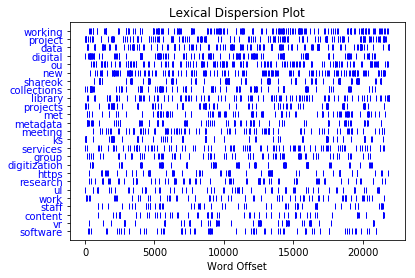

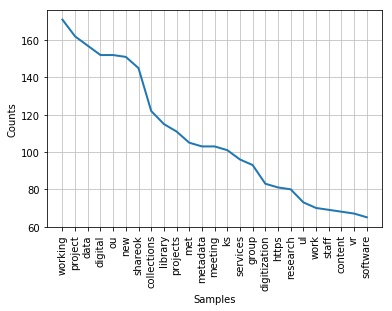

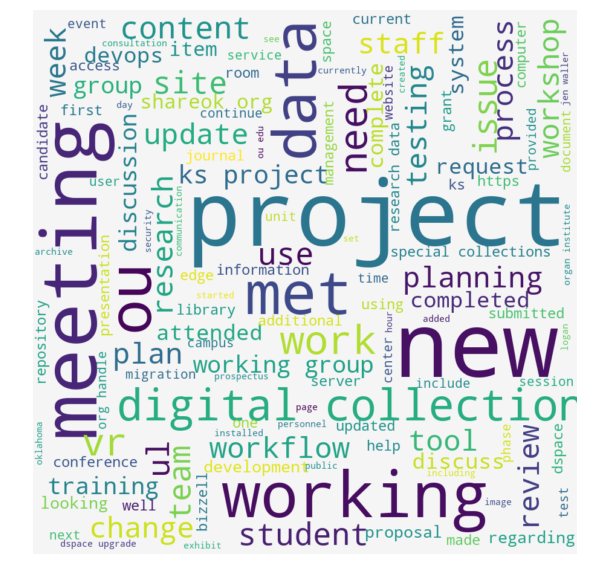

In [7]:
# Lexical Dispersion
final.dispersion_plot(top_5_fq)

#Frequency plot for the top 25 words
fq.plot(25)

# Word cloud default 200 max words
from wordcloud import WordCloud

# Read the whole text.
text = ' '.join(filtered_words)

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt

wordcloud = WordCloud(max_font_size=50, relative_scaling=1,  scale = 3., width=300, height=300, prefer_horizontal =.7,background_color='whitesmoke',normalize_plurals=True).generate(text)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('../results/''201710-201804' + '_wordcloud.png', dpi=300)

plt.show()
